# Use-case 5: Machine Learning Analysis

---
---

## Research question:
## Can we predict the ratings of a show based on the hosts of the show?

---

## Data preparation

In [172]:
#Import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
import graphviz
from sklearn.metrics import r2_score
from importlib import reload
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [173]:
#Load the data
df = pd.read_csv('data/banijay_op1data_content_ratings_twitter.csv', compression='zip')

In [174]:
pd.set_option('display.max_columns', None) #To display all columns
df.head() #To display the first 5 rows of the data

,Unnamed: 0.1,Unnamed: 0,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%,date_time,id,date,hosts,length,start,end,title,summary,keywords,date_time_start,date_time_end,show_id,fragment,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count
0,0,0,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitzenddag,9.676969,1546.863437,30.881672,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,01-06-2020,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
1,1,1,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitgesteld,1.484044,237.224411,24.692727,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,01-06-2020,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
2,2,2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,29.962268,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,01-06-2020,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
3,3,3,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,3.217735,117.833443,14.746563,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,01-06-2020,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
4,4,4,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,1.146627,41.989484,17.021271,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,01-06-2020,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0


In [175]:
df = df[df['Ratings Type'] == 'totaal'] #Only using totaal from the Ratings Type column.

In [176]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1) #Drop unnecessary columns

df['Datum'] = pd.to_datetime(df['Datum'], dayfirst=True) #Convert Datum to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True) #Convert date to datetime
df.astype({'Kdh%': 'float', 'Kdh000' : 'float', 'Zadl%' : 'float'}) #Convert Kdh%, Kdh000 and Zadl% to be able to use them in the machine learning models.

,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%,date_time,id,date,hosts,length,start,end,title,summary,keywords,date_time_start,date_time_end,show_id,fragment,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count
2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,29.962268,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,2020-06-01,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
5,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,totaal,3.975244,145.573420,15.812862,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,2020-06-01,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
8,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,totaal,6.271663,251.242825,20.356892,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,2020-06-01,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
11,2020-01-06,22:18:00,op1,npo1,6_12_jr,live/prerecorded uitzendingen,totaal,1.025859,13.510569,39.202527,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,2020-06-01,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
14,2020-01-06,22:18:00,op1,npo1,13_19_jr,live/prerecorded uitzendingen,totaal,2.895596,41.783444,22.875262,2020-01-06 22:18:00,OP1__________-WON02123548_01_segment,2020-06-01,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",00:21:40,22:17:59,22:39:40,Femke Halsema reageert op de zware kritiek op ...,De anti-racismedemonstratie op De Dam in Amste...,"['anderhalve', 'racismedemonstratie', 'hoofdst...",2020-01-06 22:17:59,2020-01-06 22:39:40,OP1__________-WON02123548,1_segment,64,109,249,45,337078.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858436,2022-10-06,23:09:00,op1,npo1,20_34_jr,live/prerecorded uitzendingen,totaal,0.188789,6.254581,2.855697,2022-10-06 23:09:00,OP1__________-WON02322316_04_segment,2022-06-10,"['Timmerman, Maaike', 'Kelder, Jort']",00:07:19,23:02:20,23:09:37,Peter Gillis en Rob Geus doen mee aan Het Jach...,Je in een oranje boevenpak laten opjagen door ...,"['op1', 'smaakpolitieman', 'vakantieparken']",2022-10-06 23:02:20,2022-10-06 23:09:37,OP1__________-WON02322316,4_segment,348,1031,1762,275,337078.0
858439,2022-10-06,23:09:00,op1,npo1,35_49_jr,live/prerecorded uitzendingen,totaal,0.915014,29.637296,6.027349,2022-10-06 23:09:00,OP1__________-WON02322316_04_segment,2022-06-10,"['Timmerman, Maaike', 'Kelder, Jort']",00:07:19,23:02:20,23:09:37,Peter Gillis en Rob Geus doen mee aan Het Jach...,Je in een oranje boevenpak laten opjagen door ...,"['op1', 'smaakpolitieman', 'vakantieparken']",2022-10-06 23:02:20,2022-10-06 23:09:37,OP1__________-WON02322316,4_segment,348,1031,1762,275,337078.0
858442,2022-10-06,23:09:00,op1,npo1

In [177]:
df.info() #To see the data types of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296287 entries, 2 to 858448
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Datum                                  296287 non-null  datetime64[ns]
 1   Time                                   296287 non-null  object        
 2   Program                                296287 non-null  object        
 3   Station                                296287 non-null  object        
 4   Target Group                           296287 non-null  object        
 5   Broadcast Type                         296287 non-null  object        
 6   Ratings Type                           296287 non-null  object        
 7   Kdh%                                   296287 non-null  float64       
 8   Kdh000                                 296287 non-null  float64       
 9   Zadl%                                  296287 no

---

## Linear Regression
## Training the machine learning model

In [178]:
df_subset = df[['hosts', 'Datum', 'Target Group']] #Creating a subset of the data to be able to use it in the machine learning models.

In [179]:
df_subset #Checking if the code provided above worked.

,hosts,Datum,Target Group
2,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",2020-01-06,tot6plus
5,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",2020-01-06,boodschapper_20_49
8,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",2020-01-06,boodschapper_25_54
11,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",2020-01-06,6_12_jr
14,"['Dijkstra, Erik', 'Veenhoven, Willemijn']",2020-01-06,13_19_jr
...,...,...,...
858436,"['Timmerman, Maaike', 'Kelder, Jort']",2022-10-06,20_34_jr
858439,"['Timmerman, Maaike', 'Kelder, Jort']",2022-10-06,35_49_jr
858442,"['Timmerman, Maaike', 'Kelder, Jort']",2022-10-06,50plus_jr
858445,"['Timmerman, Maaike', 'Kelder, Jort']",2022-10-06,m_6plus_jr


In [180]:
lr = LinearRegression() #Create a linear regression object

#one-hot encode X
X = pd.get_dummies(df_subset, columns=['hosts', 'Datum', 'Target Group']) #One-hot encoding the subset of the data
y = df['Kdh000'] #Naming the target variable

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Split the data into training and testing data.

In [182]:
lr.fit(X_train, y_train) #Fit the model to the training data
prediction = lr.predict(X_test) #Predict the target variable using the test data

In [183]:
print(prediction[0:5])
print(y_test[0:5]) #Print the first 5 predictions

[ 29.   100.5  419.   -14.75 516.25]
59953      60.936514
360866     78.924303
833972    452.099703
835264      0.000000
449286    567.206388
Name: Kdh000, dtype: float64


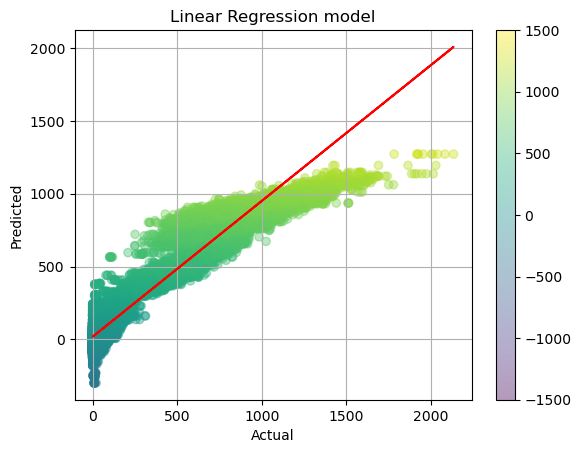

In [184]:
plt=reload(plt) #To be able to run the code multiple times without having to restart the kernel.
colors = prediction
plt.scatter(y_test, prediction, c=colors, alpha=0.4, cmap='viridis', vmin=-1500, vmax=1500)
plt.colorbar()  # show color scale
plt.title('Linear Regression model') #Add a title to the plot
plt.xlabel('Actual') #Add a label to the x-axis
plt.ylabel('Predicted') #Add a label to the y-axis
plt.grid() #Add a grid to the plot
#Putting a line in the regression plot
m, b = np.polyfit(y_test, prediction, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.savefig('visualization/Linear Regression model.png') #Save the plot as a png file

In [185]:
print('The R2 score of the Linear Regression machine learning model is', lr.score(X_test, y_test)) #Print the R2 score of the model.

The R2 score of the Linear Regression machine learning model is 0.9324436372610144


In [186]:
rmse = sqrt(mean_squared_error(y_test, prediction)) #Calculates the root mean squared error of the model's predictions on the test data y_test and the predicted output prediction.
print('The RMSE of the Linear Regression machine learning model is', rmse) #Print the RMSE

The RMSE of the Linear Regression machine learning model is 87.73235051916221


In [187]:
mse = mean_squared_error(y_test, prediction) #Calculate the MSE
print('The MSE of the Decision Tree Regression machine learning model is', mse) #Print the MSE

The MSE of the Decision Tree Regression machine learning model is 7696.965327617143


In [188]:
lasso = Lasso(alpha=10) #Create a lasso regression object
lasso.fit(X_train, y_train) #Fit the model to the training data
train_score_ls = lasso.score(X_train, y_train) #Calculate the train score
test_score_ls = lasso.score(X_test, y_test) #Calculate the test score

print('The train score of the Lasso Regression machine learning model is', test_score_ls) #Print the train score
print('The test score of the Lasso Regression machine learning model is', train_score_ls) #Print the test score

The train score of the Lasso Regression machine learning model is 0.8208023750353565
The test score of the Lasso Regression machine learning model is 0.8213689278701503


---

## Decision Tree
## Training the machine learning model

In [189]:
dt = DecisionTreeRegressor(max_depth=4, random_state = 0) #Create a decision tree regression object
dt.fit(X_train, y_train) #Fit the model to the training data

DecisionTreeRegressor(max_depth=4, random_state=0)

In [190]:
y_pred = dt.predict(X_test) #Predicting the test set results

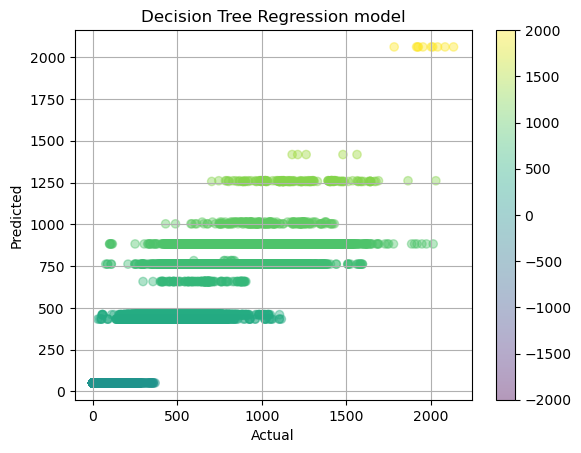

In [191]:
colors = y_pred #Creating a color scale for the plot
plt.scatter(y_test, y_pred, c=colors, alpha=0.4, cmap='viridis', vmin=-2000, vmax=2000) #Plotting the actual values against the predicted values
plt.colorbar()  # show color scale
plt.title('Decision Tree Regression model') #Giving the plot a title
plt.xlabel('Actual') #Giving the x-axis a label
plt.ylabel('Predicted') #Giving the y-axis a label
plt.grid() #Adding a grid to the plot
plt.savefig('visualization/Decision Tree Regression model.png') #Saving the plot as a png file

In [192]:
print('The R2 score of the Decision Tree Regression machine learning model is', dt.score(X_test, y_test)) #Print the R2 score of the model

The R2 score of the Decision Tree Regression machine learning model is 0.8852626982324784


In [193]:
rmse = sqrt(mean_squared_error(y_test, y_pred)) #Calculates the root mean squared error of the model's predictions on the test data y_test and the predicted output y_pred
print('The RMSE of the Decision Tree Regression machine learning model is', rmse) #Print the RMSE

The RMSE of the Decision Tree Regression machine learning model is 114.33493570956153


In [194]:
mse = mean_squared_error(y_test, y_pred) #Calculate the MSE
print('The MSE of the Decision Tree Regression machine learning model is', mse) #Print the MSE

The MSE of the Decision Tree Regression machine learning model is 13072.47752370957


In [195]:
text_representation = tree.export_text(dt) 
print(text_representation) #Print the decision tree in a text format

|--- feature_682 <= 0.50
|   |--- feature_677 <= 0.50
|   |   |--- feature_683 <= 0.50
|   |   |   |--- feature_681 <= 0.50
|   |   |   |   |--- value: [50.91]
|   |   |   |--- feature_681 >  0.50
|   |   |   |   |--- value: [432.81]
|   |   |--- feature_683 >  0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- value: [459.47]
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- value: [657.63]
|   |--- feature_677 >  0.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- value: [761.79]
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- value: [1002.98]
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_328 <= 0.50
|   |   |   |   |--- value: [1013.63]
|   |   |   |--- feature_328 >  0.50
|   |   |   |   |--- value: [1417.67]
|--- feature_682 >  0.50
|   |--- feature_107 <= 0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- value: [882.71]
|   |   |   |--- feature_21 >  0.50
|   |  

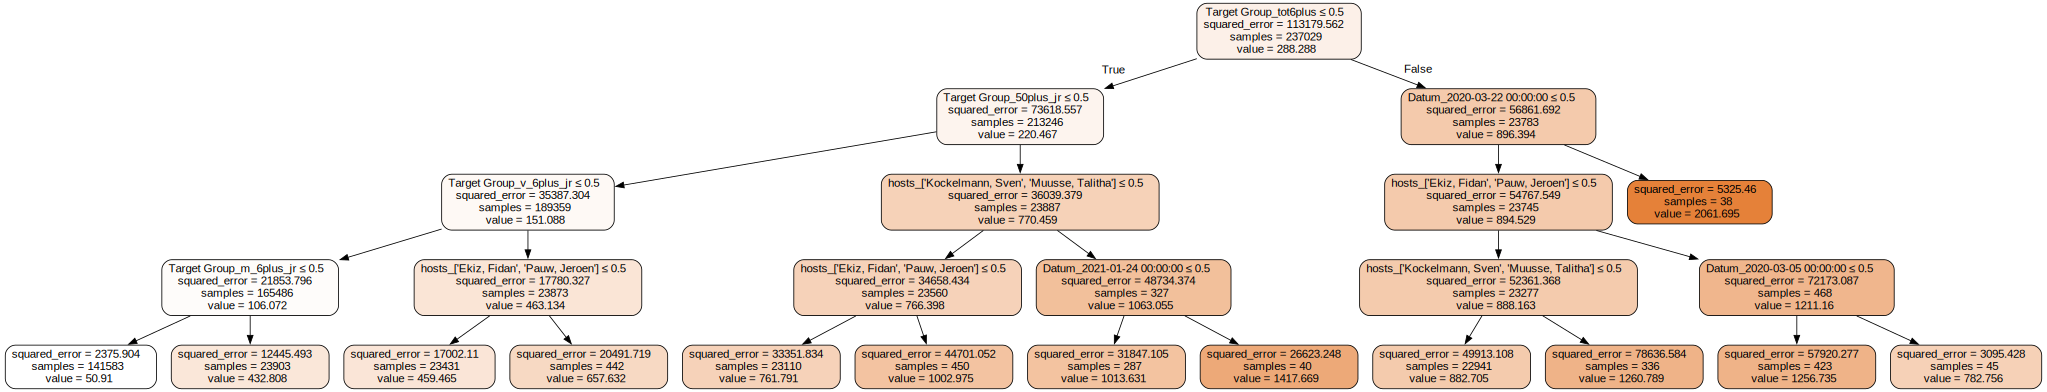

In [196]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns, #The name of the features
                                class_names=['Kdh000'], #The name of the target variable
                                filled=True, rounded=True, #To make the plot look nice
                                special_characters=True) 
graph = graphviz.Source(dot_data, format="pdf") #Create a graphviz object
graph #Show the decision tree

In [197]:
#Save the decision tree as a png file
graph.render("visualization/Decision Tree Regression model", view=True) #Save the decision tree as a pdf file

'visualization\\Decision Tree Regression model.pdf'

In [198]:
#split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

#define list of possible hyperparameter values
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
val_mse_list = []

#Create a dictionary of the hyperparameters
param_grid = {'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf}

#loop through all possible combinations of hyperparameters
for max_depth_val in max_depth:
    for min_samples_leaf_val in min_samples_leaf:
        #create a model with the current hyperparameters
        mod_dt = DecisionTreeRegressor(max_depth=max_depth_val, min_samples_leaf=min_samples_leaf_val)
        #fit the model to the training data
        mod_dt.fit(X_train, y_train)
        #evaluate the model on the validation data
        val_mse = mean_squared_error(y_valid, mod_dt.predict(X_valid))
        val_mse_list.append(val_mse)
        #print the hyperparameters and the validation MSE
        print(f"max_depth: {max_depth_val}, min_samples_leaf: {min_samples_leaf_val}, Validation MSE: {val_mse}")

max_depth: 2, min_samples_leaf: 1, Validation MSE: 37488.48367365228
max_depth: 2, min_samples_leaf: 2, Validation MSE: 37488.48367365227
max_depth: 2, min_samples_leaf: 3, Validation MSE: 37488.48367365227
max_depth: 2, min_samples_leaf: 4, Validation MSE: 37488.48367365227
max_depth: 2, min_samples_leaf: 5, Validation MSE: 37488.48367365225
max_depth: 2, min_samples_leaf: 6, Validation MSE: 37488.48367365228
max_depth: 2, min_samples_leaf: 7, Validation MSE: 37488.48367365228
max_depth: 2, min_samples_leaf: 8, Validation MSE: 37488.48367365227
max_depth: 2, min_samples_leaf: 9, Validation MSE: 37488.48367365226
max_depth: 2, min_samples_leaf: 10, Validation MSE: 37488.48367365228
max_depth: 3, min_samples_leaf: 1, Validation MSE: 25740.5786862524
max_depth: 3, min_samples_leaf: 2, Validation MSE: 25740.5786862524
max_depth: 3, min_samples_leaf: 3, Validation MSE: 25740.578686252396
max_depth: 3, min_samples_leaf: 4, Validation MSE: 25740.578686252396
max_depth: 3, min_samples_leaf: 5